In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv("/content/bank-full.csv", sep = ';')

In [ ]:
df.shape

(45211, 17)

In [ ]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  campaign   45211 non-null  int64 
 12  pdays      45211 non-null  int64 
 13  previous   45211 non-null  int64 
 14  poutcome   45211 non-null  object
 15  y          45211 non-null  object
dtypes: int64(6), object(10)
memory usage: 5.5+ MB


In [ ]:
df.isnull().sum()

,0
age,0
job,0
marital,0
education,0
default,0
balance,0
housing,0
loan,0
contact,0
day,0


In [ ]:
df.duplicated().sum()

np.int64(0)

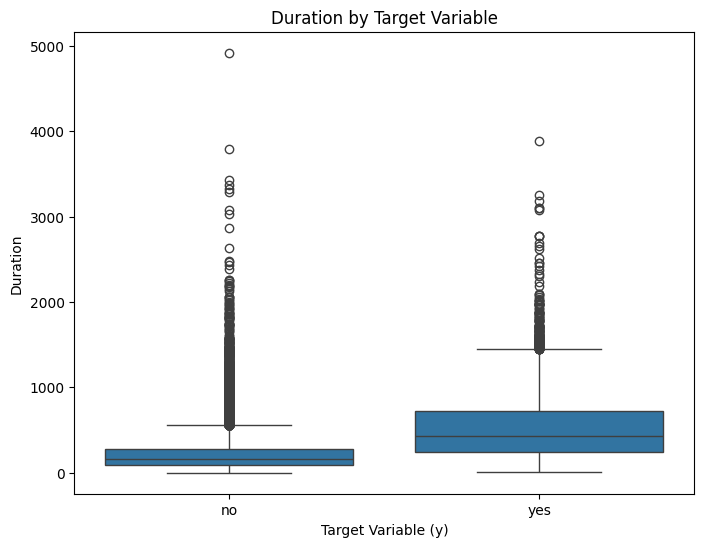

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.boxplot(x='y', y='duration', data=df)
plt.title('Duration by Target Variable')
plt.xlabel('Target Variable (y)')
plt.ylabel('Duration')
plt.show()

In [ ]:
df = df.replace('unknown', 'Unknown')  #as category daved hai


In [ ]:
df.drop('duration', axis=1, inplace=True)


In [ ]:
X = df.drop('y', axis=1)
y = df['y'] # vertical split

In [ ]:
categorical_cols = X.select_dtypes(include=['object']).columns
X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # horizontal


In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_re, y_train_re = smote.fit_resample(X_train, y_train)

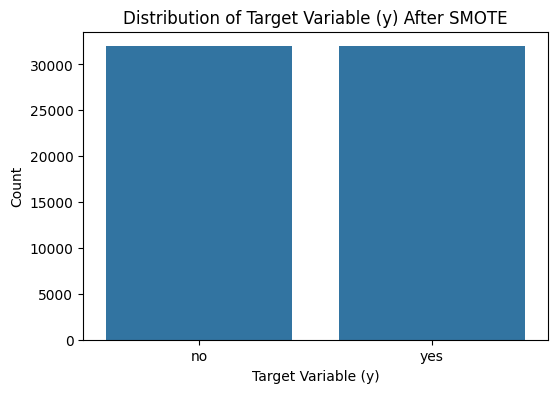

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
sns.countplot(x=y_train_re)
plt.title('Distribution of Target Variable (y) After SMOTE')
plt.xlabel('Target Variable (y)')
plt.ylabel('Count')
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns
X_train_re[numerical_cols] = scaler.fit_transform(X_train_re[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_re, y_train_re)
y_pred = knn_model.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label='yes', zero_division=1)
recall = recall_score(y_test, y_pred, pos_label='yes', zero_division=1)
f1 = f1_score(y_test, y_pred, pos_label='yes', zero_division=1)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

Accuracy: 0.8487
Precision: 0.3815
Recall: 0.4088
F1-score: 0.3947


In [ ]:
acc_scores = []
k_values = range(1, 21,2) #odd

for k in k_values:
  if k % 2 != 0 :
        knn_model = KNeighborsClassifier(n_neighbors=k)
        knn_model.fit(X_train_re, y_train_re)
        y_pred = knn_model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        acc_scores.append(accuracy)

print("Accuracy for different k values:", acc_scores)

Accuracy for different k values: [0.8259427181245163, 0.8477275240517528, 0.8487227689925909, 0.8476169412805485, 0.8489439345349995, 0.846068782483689, 0.8454052858564636, 0.8433042132035828, 0.8426407165763574, 0.8405396439234767]


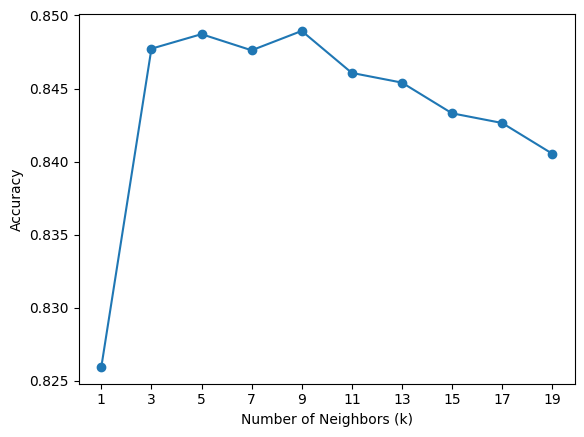

In [ ]:
import matplotlib.pyplot as plt

k_values = [k for k in range(1, 21, 2)] #ODD

plt.plot(k_values, acc_scores, marker='o')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.xticks(k_values)
#plt.grid(True)
plt.show()

In [ ]:
from sklearn.model_selection import StratifiedKFold, cross_val_score


knn_model_cv = KNeighborsClassifier(n_neighbors=5)


cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

scores = cross_val_score(knn_model_cv, X, y, cv=cv, scoring='accuracy')

print(f"Cross-validation accuracy scores: {scores}")
print(f"Average cross-validation accuracy: {scores.mean():.4f}")

Cross-validation accuracy scores: [0.87393564 0.88077859 0.87458527 0.87591241 0.87735014]
Average cross-validation accuracy: 0.8765


In [ ]:
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
import numpy as np

RANDOM_STATE = 42
n_splits = 5


print("--- Train-Test Split with SMOTE and Scaling ---")
X_train_rs, X_test_rs, y_train_rs, y_test_rs = train_test_split(X, y, test_size=0.2, random_state=RANDOM_STATE, stratify=y)

# Apply SMOTE to the training data
smote = SMOTE(random_state=RANDOM_STATE)
X_train_rs_resampled, y_train_rs_resampled = smote.fit_resample(X_train_rs, y_train_rs)

# Scale numerical features
scaler = StandardScaler()
numerical_cols = X_train_rs_resampled.select_dtypes(include=['int64', 'float64']).columns
X_train_rs_resampled[numerical_cols] = scaler.fit_transform(X_train_rs_resampled[numerical_cols])
X_test_rs[numerical_cols] = scaler.transform(X_test_rs[numerical_cols])

knn_model_rs = KNeighborsClassifier(n_neighbors=5)
knn_model_rs.fit(X_train_rs_resampled, y_train_rs_resampled)
y_pred_rs = knn_model_rs.predict(X_test_rs)
accuracy_rs = accuracy_score(y_test_rs, y_pred_rs)

print(f"Accuracy with random state {RANDOM_STATE}: {accuracy_rs:.4f}")

print("\n--- Stratified Cross-Validation with SMOTE and Scaling (Manual Implementation) ---")
knn_model_cv_rs = KNeighborsClassifier(n_neighbors=5)

cv_rs = StratifiedKFold(n_splits=5, shuffle=True, random_state=RANDOM_STATE)

cv_accuracy_scores = []

for fold, (train_index, val_index) in enumerate(cv_rs.split(X, y)):
    print(f"Processing Fold {fold+1}/{n_splits}")

    X_train_fold, X_val_fold = X.iloc[train_index], X.iloc[val_index]
    y_train_fold, y_val_fold = y.iloc[train_index], y.iloc[val_index]

    # Apply SMOTE to the training data of the current fold (potential data leakage)
    smote_fold = SMOTE(random_state=RANDOM_STATE)
    X_train_fold_resampled, y_train_fold_resampled = smote_fold.fit_resample(X_train_fold, y_train_fold)

    # Scale numerical features for the current fold
    scaler_fold = StandardScaler()
    numerical_cols_fold = X_train_fold_resampled.select_dtypes(include=['int64', 'float64']).columns
    X_train_fold_resampled[numerical_cols_fold] = scaler_fold.fit_transform(X_train_fold_resampled[numerical_cols_fold])
    X_val_fold = X_val_fold.copy()
    X_val_fold[numerical_cols_fold] = scaler_fold.transform(X_val_fold[numerical_cols_fold])


    # Initialize and train the KNN model for the current fold
    knn_model_fold = KNeighborsClassifier(n_neighbors=5)
    knn_model_fold.fit(X_train_fold_resampled, y_train_fold_resampled)

    # Make predictions on the validation set of the current fold
    y_pred_fold = knn_model_fold.predict(X_val_fold)

    # Calculate accuracy for the current fold
    accuracy_fold = accuracy_score(y_val_fold, y_pred_fold)
    cv_accuracy_scores.append(accuracy_fold)
    print(f"Accuracy for Fold {fold+1}: {accuracy_fold:.4f}")

mean_accuracy = np.mean(cv_accuracy_scores)
std_accuracy = np.std(cv_accuracy_scores)

print(f"\nMean Accuracy across {n_splits} folds: {mean_accuracy:.4f}")
print(f"Standard Deviation of Accuracy across {n_splits} folds: {std_accuracy:.4f}")

--- Train-Test Split with SMOTE and Scaling ---


NameError: name 'X' is not defined

In [ ]:
# Find the optimal k value based on the highest accuracy from the previous calculation
optimal_k_index = np.argmax(acc_scores)
optimal_k = k_values[optimal_k_index]
print(f"The optimal number of neighbors (k) found is: {optimal_k}")
print(f"The corresponding accuracy is: {acc_scores[optimal_k_index]:.4f}")

The optimal number of neighbors (k) found is: 9
The corresponding accuracy is: 0.8489


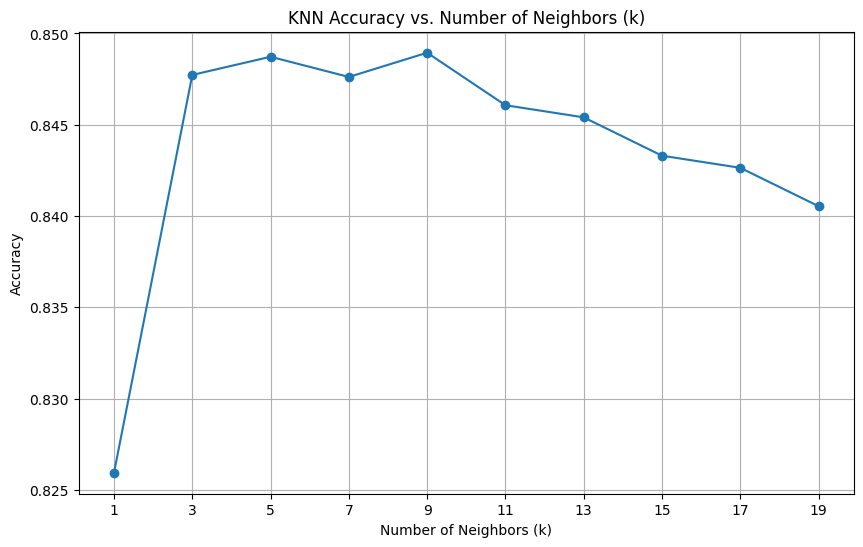

In [ ]:
import matplotlib.pyplot as plt

k_values = [k for k in range(1, 21, 2)] #ODD

plt.figure(figsize=(10, 6))
plt.plot(k_values, acc_scores, marker='o', linestyle='-')
plt.title('KNN Accuracy vs. Number of Neighbors (k)')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.grid(True)
plt.savefig('knn_cv_plot.png')
plt.show()

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Use the scaled data for evaluation
X_train_eval = X_train_resampled # Using resampled and scaled training data
X_test_eval = X_test # Using scaled test data

# euclidean
knn_euclidean = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn_euclidean.fit(X_train_eval, y_train_resampled) # Use resampled training labels
y_pred_euclidean = knn_euclidean.predict(X_test_eval)

accuracy_euclidean = accuracy_score(y_test, y_pred_euclidean)
precision_euclidean = precision_score(y_test, y_pred_euclidean, pos_label='yes', zero_division=1)
recall_euclidean = recall_score(y_test, y_pred_euclidean, pos_label='yes', zero_division=1)
f1_euclidean = f1_score(y_test, y_pred_euclidean, pos_label='yes', zero_division=1)

print("Results for Euclidean metric:")
print(f"  Accuracy: {accuracy_euclidean:.4f}")
print(f"  Precision: {precision_euclidean:.4f}")
print(f"  Recall: {recall_euclidean:.4f}")
print(f"  F1-score: {f1_euclidean:.4f}")
print("-" * 20)

# manhattan
knn_manhattan = KNeighborsClassifier(n_neighbors=5, metric='manhattan') # Using k=5
knn_manhattan.fit(X_train_eval, y_train_resampled) # Use resampled training labels
y_pred_manhattan = knn_manhattan.predict(X_test_eval)

accuracy_manhattan = accuracy_score(y_test, y_pred_manhattan)
precision_manhattan = precision_score(y_test, y_pred_manhattan, pos_label='yes', zero_division=1)
recall_manhattan = recall_score(y_test, y_pred_manhattan, pos_label='yes', zero_division=1)
f1_manhattan = f1_score(y_test, y_pred_manhattan, pos_label='yes', zero_division=1)

print("Results for Manhattan metric:")
print(f"  Accuracy: {accuracy_manhattan:.4f}")
print(f"  Precision: {precision_manhattan:.4f}")
print(f"  Recall: {recall_manhattan:.4f}")
print(f"  F1-score: {f1_manhattan:.4f}")
print("-" * 20)

# cosine
knn_cosine = KNeighborsClassifier(n_neighbors=5, metric='cosine') # Using k=5
knn_cosine.fit(X_train_eval, y_train_resampled) # Use resampled training labels
y_pred_cosine = knn_cosine.predict(X_test_eval)

accuracy_cosine = accuracy_score(y_test, y_pred_cosine)
precision_cosine = precision_score(y_test, y_pred_cosine, pos_label='yes', zero_division=1)
recall_cosine = recall_score(y_test, y_pred_cosine, pos_label='yes', zero_division=1)
f1_cosine = f1_score(y_test, y_pred_cosine, pos_label='yes', zero_division=1)

print("Results for Cosine metric:")
print(f"  Accuracy: {accuracy_cosine:.4f}")
print(f"  Precision: {precision_cosine:.4f}")
print(f"  Recall: {recall_cosine:.4f}")
print(f"  F1-score: {f1_cosine:.4f}")
print("-" * 20)

# minkowski with p=3
knn_minkowski_p3 = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=3) # Using k=5 and p=3
knn_minkowski_p3.fit(X_train_eval, y_train_resampled) # Use resampled training labels
y_pred_minkowski_p3 = knn_minkowski_p3.predict(X_test_eval)

accuracy_minkowski_p3 = accuracy_score(y_test, y_pred_minkowski_p3)
precision_minkowski_p3 = precision_score(y_test, y_pred_minkowski_p3, pos_label='yes', zero_division=1)
recall_minkowski_p3 = recall_score(y_test, y_pred_minkowski_p3, pos_label='yes', zero_division=1)
f1_minkowski_p3 = f1_score(y_test, y_pred_minkowski_p3, pos_label='yes', zero_division=1)

print("Results for Minkowski metric with p=3:")
print(f"  Accuracy: {accuracy_minkowski_p3:.4f}")
print(f"  Precision: {precision_minkowski_p3:.4f}")
print(f"  Recall: {recall_minkowski_p3:.4f}")
print(f"  F1-score: {f1_minkowski_p3:.4f}")
print("-" * 20)

Results for Euclidean metric:
  Accuracy: 0.8487
  Precision: 0.3815
  Recall: 0.4088
  F1-score: 0.3947
--------------------
Results for Manhattan metric:
  Accuracy: 0.8548
  Precision: 0.3978
  Recall: 0.3960
  F1-score: 0.3969
--------------------
Results for Cosine metric:
  Accuracy: 0.8620
  Precision: 0.4181
  Recall: 0.3676
  F1-score: 0.3912
--------------------


In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print("--- Naive Bayes Model Evaluation ---")

# Initialize the Gaussian Naive Bayes model
nb_model = GaussianNB()

# Train the Naive Bayes model on the resampled and scaled training data
nb_model.fit(X_train_rs_resampled, y_train_rs_resampled)

# Make predictions on the scaled test data
y_pred_nb = nb_model.predict(X_test_rs)

# Evaluate the model's performance
accuracy_nb = accuracy_score(y_test_rs, y_pred_nb)
precision_nb = precision_score(y_test_rs, y_pred_nb, zero_division=1)
recall_nb = recall_score(y_test_rs, y_pred_nb, zero_division=1)
f1_nb = f1_score(y_test_rs, y_pred_nb, zero_division=1)

print(f"Accuracy: {accuracy_nb:.4f}")
print(f"Precision: {precision_nb:.4f}")
print(f"Recall: {recall_nb:.4f}")
print(f"F1-score: {f1_nb:.4f}")

NameError: name 'RANDOM_STATE' is not defined